**An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.**

**Data Description**

**ID**: ID Number of Customers.

**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.

**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.

**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

**Cost of the product**: Cost of the Product in US Dollars.

**Prior purchases**: The Number of Prior Purchase.

**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.

**Gender**: Male and Female.

**Discount offered**: Discount offered on that specific product.

**Weight in gms**: It is the weight in grams.

**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


[Source Dataset](https://www.kaggle.com/datasets/prachi13/customer-analytics?select=Train.csv)

#Import Library

In [ ]:
#Lib for dataframe, agg, and data viz
from IPython import display
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 0
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
from textwrap import wrap
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#lib for preprocessing
# Library for Scalling Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import boxcox
import warnings
# Library for Split Data
from sklearn.model_selection import train_test_split
# Library for Z-Score
from scipy import stats

# Import Library

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate



## Load Data Frame

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#%cd /content/gdrive/My Drive/Colab Notebooks/FINPRO RAKAMIN 29/

In [ ]:
df = pd.read_csv('Train.csv')
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
5590,5591,C,Road,5,5,195,4,medium,M,1,4482,0
7897,7898,F,Ship,3,4,163,3,high,F,6,5912,0
4873,4874,F,Ship,4,4,225,2,medium,M,10,4829,1
7460,7461,A,Ship,7,2,289,4,low,M,5,1918,1
6318,6319,D,Flight,6,3,191,6,medium,F,2,4471,0


#Stage 1 Exploratory Data Analytics (EDA)

In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


##Checking Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
import missingno as msno
msno.bar(df, color = 'red')
plt.title('Checking for Null Values\n', fontsize = 40)
plt.show()

ModuleNotFoundError: No module named 'missingno'

Tidak ada data null 

Type data sudah sesuai semua


## Checking how many order reached on time

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='count'>

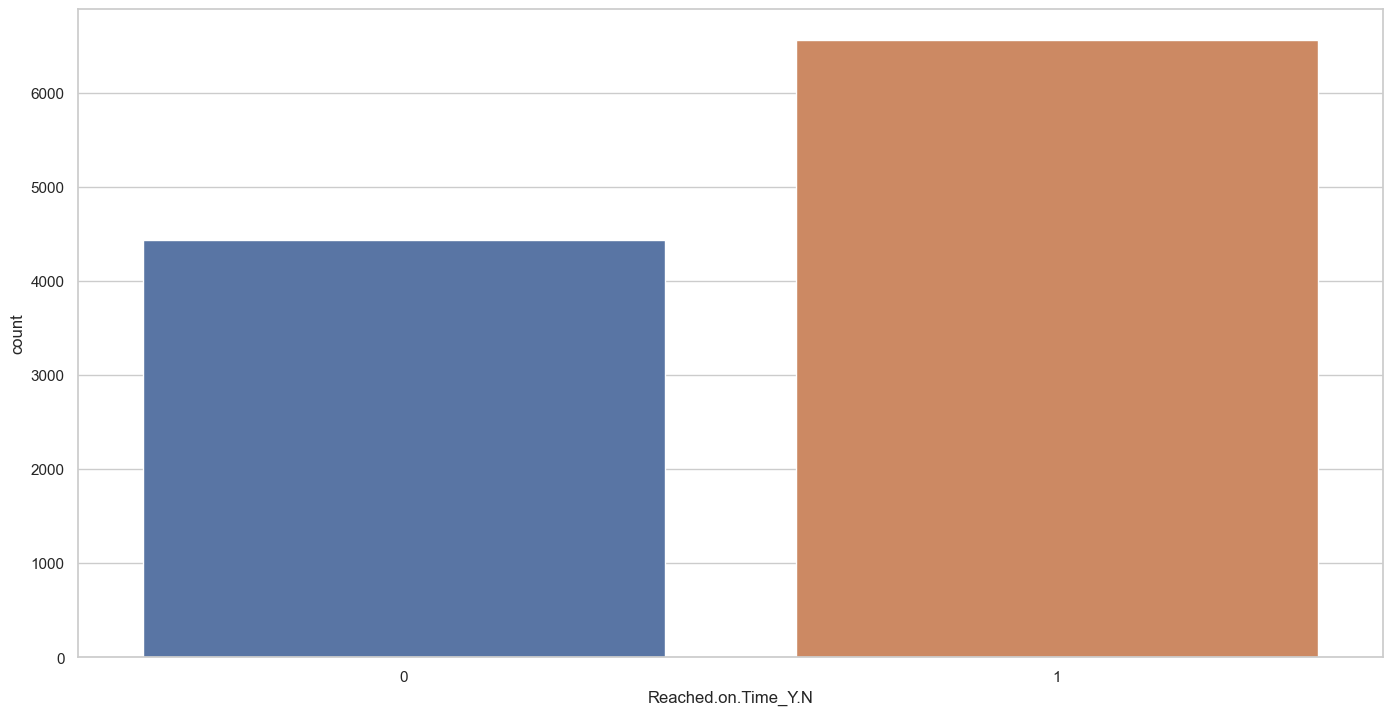

In [8]:
plt.figure(figsize= (15,8))
sns.countplot(data=df, x='Reached.on.Time_Y.N')

In [ ]:
df['Reached.on.Time_Y.N'].value_counts()

Dari Visualisasi countplot terlihat 60% dari total pesanan tidak terkirim tepat waktu kepada pelanggan.

## Seperating Numerical & Categorical Columns

In [ ]:
df_numerical = df.select_dtypes(exclude='object')
df_categorical = df.select_dtypes(include='object')

In [ ]:
df_numerical

In [ ]:
df_categorical

In [ ]:
numerical = df_numerical.columns.values
categorical = df_categorical.columns.values

## Numerical Feature

In [ ]:
plt.figure(figsize=(20,7))
pal = sns.color_palette()
for i in range(0, len(numerical)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[numerical[i]], color=pal[i])
    plt.xlabel(numerical[i])
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,7))
pal = sns.color_palette()
for i in range(0, len(numerical)):
    plt.subplot(2, 4, i+1)
    sns.histplot(x=df[numerical[i]], color=pal[i])
    plt.xlabel(numerical[i])
    plt.tight_layout()

### Interpretasi:  Tolong !!!




## Categorical Feature

In [ ]:
plt.figure(figsize=(13,10))
for i in range(0, len(categorical)):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[categorical[i]], shrink=0.8)
    plt.tight_layout()

### Interpretasi:  Tolong !!!

## Data Exploration

In [ ]:
feat = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender']
for f in feat:
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.countplot(x=f,data=df,hue="Reached.on.Time_Y.N")
    ax.legend(["Delivered on time","Not delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)

### Interpretasi

Customer rating kok kayak kelihatan tidak mempengaruhi ke pesanan dikirim tepat waktu atau tidak ya ?

Customer_care_calls yang menelepon perusahaan 4 - 6 kali memiliki kecenderungan pesanan akan dikirimkan tepat waktu


## Checking Outliers

In [ ]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]], color='lightblue',  orient='v')
    plt.tight_layout()

### Interpretasi


## Heatmap

In [ ]:
df.drop(columns = 'ID', inplace = True)

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, annot_kws = {'size' : 20}, linewidth = 2, linecolor = 'white')
plt.show()

### Interpretasi

Setiap feature memengaruhi feature lain dalam dataframe. 
Tujuan heatmap adalah untuk melihat korelasi antar feature


#### Korelasi Positif dan Negatif
- Dikatakan korelasi positif ketika dua variabel bergerak bersamaan, artinya ketika satu naik, yang lain biasanya akan naik juga.
- Dikatakan negatif ketika dua variabel cenderung bergerak berlawanan satu sama lain sehingga ketika satu variabel naik, variabel lainnya cenderung turun.

#### Kesimpulan dari Heatmap :
- Discount offered berkorelasi positif tinggi dengan feature target Reached on Time or Not sebesar 40%.
- Discount offered berkorelasi negatif dengan Weight in gms -38%.
- Customer care calls berkorelasi positif dengan cost of the product 32%.
- Customer care calls dan weight in gms memiliki korelasi negatif -28%


# Stage 2 Pre-processing Data

## Handle Outliers

### Z-Score Outliers

In [ ]:
df_outliers = ['Prior_purchases', 'Discount_offered']

In [ ]:
from scipy.stats import zscore

for i in df_outliers:
    print(i)
    z_scores = zscore(df[i])
    print("*"*50)
    for threshold in np.arange(1,5,0.5):
        print("Treshold: {}".format(threshold))
        print("Amount of Outliers: {}".format(len((np.where(z_scores >= threshold)[0]))))
        print('------')

### Decision

In [ ]:
print(f'Number of rows before deleting outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Prior_purchases','Discount_offered']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore <= 2) & filtered_entries # keep data 
    
dfz = df[filtered_entries]

print(f'Number of row after deleting outliers: {len(dfz)}')

## Encoding

### Gender Encoding

In [ ]:
map_gender = {'M' : 0, 'F':1}
dfz['enc_gender'] = df['Gender'].map(map_gender)

### Product Importance Encoding

In [ ]:
map_Pi = {'low' : 0, 'medium':1, 'high':2}
dfz['enc_Product_importance'] = df['Product_importance'].map(map_Pi)

### Mode of Shipment Encoding

In [ ]:
ohe_ship = pd.get_dummies(df['Mode_of_Shipment'], prefix='mode')
dfz = dfz.join(ohe_ship)

### Warehouse Block Encoding

In [ ]:
ohe_ware = pd.get_dummies(df['Warehouse_block'], prefix='Warehouse')
df_final = dfz.join(ohe_ware)

In [ ]:
df_final

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
df_final['std_Customer_care_calls'] = ss().fit_transform(df_final['Customer_care_calls'].values.reshape(len(df_final),1))
df_final['std_Customer_rating'] = ss().fit_transform(df_final['Customer_rating'].values.reshape(len(df_final),1))
df_final['std_Cost_of_the_Product'] = ss().fit_transform(df_final['Cost_of_the_Product'].values.reshape(len(df_final),1))
df_final['std_Prior_purchases'] = ss().fit_transform(df_final['Prior_purchases'].values.reshape(len(df_final),1))
df_final['std_Discount_offered'] = ss().fit_transform(df_final['Discount_offered'].values.reshape(len(df_final),1))
df_final['std_Weight_in_gms'] = ss().fit_transform(df_final['Weight_in_gms'].values.reshape(len(df_final),1))

In [ ]:
df_final

In [ ]:
df_end = df_final.drop(columns = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'enc_gender'])

In [ ]:
df_end

# Stage 3 Machine Learning

## Train & Test Split

In [ ]:
X = df_end.drop(['Reached.on.Time_Y.N'], axis=1)
y = df_end[['Reached.on.Time_Y.N']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
y_train['Reached.on.Time_Y.N'].value_counts()

## Model Evaluation